# Volúmenes finitos: método aguas arriba

El método aguas arriba para la ecuación de advección con coeficiente constant $\beta>0$,f
$$
q_t + \beta q_x =0
$$
se basa en la elección del flujo
$$
F^n_{i-1/2}=\beta Q^n_{i-1}.
$$
Esto conduce al siguiente esquema numérico:
$$
Q^{n+1}_i = Q^n_i - \beta\frac{\Delta t}{\Delta x} (Q^n_{i} - Q^n_{i-1}).
$$

El método anterior se puede interpretar como una aproximación hacia atrás de la derivada de $q$ en $x_i$, en vez de una aproximación centrada.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def advección1D_MVF_Upwind(a, b, beta, Q_inicial, dx, dt, nt):
    nx = len(Q_inicial)
    Q = np.empty( (nt+1,nx) )
    Q[0,:] = Q_inicial # Iniciamos Q en el t0 
    r = dt/dx*beta 
    print(f"r = {r}")
    if(r>=1): 
        print(f"Cuidado! no se verifica la condición CFL")
    for n in range(nt):
        # 1. Introducir condiciones de contorno (Dirichlet)
        Q[n+1, 0], Q[n+1,-1] = Q[n, 0], Q[n,-1]
        # 2. Calcular valores internos
        for i in range(1,nx-1): # 1,...,nx-2
            Q[n+1, 1:nx] = Q[n, 1:nx] \
                - r*(Q[n,1:nx]-Q[n,0:nx-1])
    return(Q)

In [6]:
# Datos
a, b = 0, 1
nx=40
x_i = np.linspace(a,b,nx)
def q0(x): return np.exp(-50*(x-0.3)**2)
Q0 = q0(x_i)

# Test
nt = 100
Q = advección1D_MVF_Upwind(a,b, beta=1, Q_inicial=Q0, 
                                   dx=x_i[1]-x_i[0], dt=0.01, nt=nt)

fotogramas_a_mostrar = list() #list(range(0,nt,10))
for i in fotogramas_a_mostrar:
    print(f"Fotograma {i}")
    plt.ylim((-2,2))
    plt.plot(Q[i,:])
    plt.show()

r = 0.39


# Animación

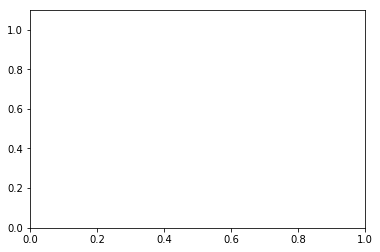

In [7]:
from matplotlib import animation, rc
from IPython.display import HTML

# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim(( a, b))
y_m = 1.1*min(Q[0,:])
y_M = 1.1*max(Q[0,:])
ax.set_ylim( (y_m, y_M) )

line, = ax.plot([], [], lw=2)

# Initialization function, which plots the background of each frame:
def init():
    line.set_data([], [])
    return (line,)

# Animation function, which is called for each new frame:
def animate(i):
    y_i = Q[i,:]
    line.set_data(x_i, y_i)
    ax.set_title(f"Etapa de tiempo {i}")
    return (line,)

# Compile the animation. Setting blit=True will only re-draw
# the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=nt, interval=20, 
                               blit=True)


In [8]:
HTML(anim.to_jshtml())